Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


A single hidden neuron can create only one linear decision boundary, which is insufficient for XOR. At least two hidden neurons are needed to form multiple linear regions that can be combined to produce a non-linear separation.

Architecture I used:-
2 inputs-->2 hidden neurons--> 1 output

Sigmoid activation

MSE loss

Gradient Descent(BackPropagation)



two inputs:-X1,X2... two hidden neurons -h1,h2,one output y

In [ ]:
X=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])
y=np.array([[0],[1],[1],[0]])


Initialise weights and biases for input to hidden layer and hidden layer to output layer -
W1,b1,W2,b2

In [ ]:
np.random.seed(1)

W1 = np.random.uniform(size=(2,2))
b1 = np.random.uniform(size=(1,2))
print(W1)
print(b1)
W2= np.random.uniform(size=(2,1))
b2 = np.random.uniform(size=(1,1))

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]]
[[0.14675589 0.09233859]]


In [ ]:
print(W2)
print(b2)

[[0.18626021]
 [0.34556073]]
[[0.39676747]]


Hyperparameters:- Learning rate and epoch(how many interation)

In [ ]:
lr = 0.1
epochs = 10000

Sigmoid function and its derivative(activation function(non linear))

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):

    return a * (1 - a)

Training loop

In [ ]:

for epoch in range(epochs):

    # FORWARD PASS
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    #  LOSS (MSE)
    loss = np.mean((y_hat - y) ** 2)

    #BACKPROPAGATION

    # Output layer
    dL_dyhat = (y_hat - y)
    dyhat_dz2 = sigmoid_derivative(y_hat)
    delta2 = dL_dyhat * dyhat_dz2

    dL_dW2 = a1.T @ delta2
    dL_db2 = np.sum(delta2, axis=0, keepdims=True)

    # Hidden layer
    dz2_da1 = W2.T
    da1_dz1 = sigmoid_derivative(a1)

    delta1 = (delta2 @ dz2_da1) * da1_dz1

    dL_dW1 = X.T @ delta1
    dL_db1 = np.sum(delta1, axis=0, keepdims=True)

    # GRADIENT DESCENT UPDATE
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2

    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2801
Epoch 100, Loss: 0.2499
Epoch 200, Loss: 0.2499
Epoch 300, Loss: 0.2499
Epoch 400, Loss: 0.2499
Epoch 500, Loss: 0.2499
Epoch 600, Loss: 0.2498
Epoch 700, Loss: 0.2498
Epoch 800, Loss: 0.2498
Epoch 900, Loss: 0.2498
Epoch 1000, Loss: 0.2497
Epoch 1100, Loss: 0.2497
Epoch 1200, Loss: 0.2496
Epoch 1300, Loss: 0.2495
Epoch 1400, Loss: 0.2495
Epoch 1500, Loss: 0.2494
Epoch 1600, Loss: 0.2492
Epoch 1700, Loss: 0.2491
Epoch 1800, Loss: 0.2489
Epoch 1900, Loss: 0.2487
Epoch 2000, Loss: 0.2483
Epoch 2100, Loss: 0.2480
Epoch 2200, Loss: 0.2475
Epoch 2300, Loss: 0.2468
Epoch 2400, Loss: 0.2460
Epoch 2500, Loss: 0.2450
Epoch 2600, Loss: 0.2437
Epoch 2700, Loss: 0.2422
Epoch 2800, Loss: 0.2403
Epoch 2900, Loss: 0.2379
Epoch 3000, Loss: 0.2352
Epoch 3100, Loss: 0.2319
Epoch 3200, Loss: 0.2281
Epoch 3300, Loss: 0.2238
Epoch 3400, Loss: 0.2190
Epoch 3500, Loss: 0.2139
Epoch 3600, Loss: 0.2086
Epoch 3700, Loss: 0.2032
Epoch 3800, Loss: 0.1978
Epoch 3900, Loss: 0.1927
Epoch 4000, 

In [ ]:
# Final Predictions
print("Final Predictions:")
print(np.round(y_hat))

Final Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


[[-0.5  -0.49 -0.48 ...  1.47  1.48  1.49]
 [-0.5  -0.49 -0.48 ...  1.47  1.48  1.49]
 [-0.5  -0.49 -0.48 ...  1.47  1.48  1.49]
 ...
 [-0.5  -0.49 -0.48 ...  1.47  1.48  1.49]
 [-0.5  -0.49 -0.48 ...  1.47  1.48  1.49]
 [-0.5  -0.49 -0.48 ...  1.47  1.48  1.49]] [[-0.5  -0.5  -0.5  ... -0.5  -0.5  -0.5 ]
 [-0.49 -0.49 -0.49 ... -0.49 -0.49 -0.49]
 [-0.48 -0.48 -0.48 ... -0.48 -0.48 -0.48]
 ...
 [ 1.47  1.47  1.47 ...  1.47  1.47  1.47]
 [ 1.48  1.48  1.48 ...  1.48  1.48  1.48]
 [ 1.49  1.49  1.49 ...  1.49  1.49  1.49]]
[[-0.5  -0.5 ]
 [-0.49 -0.5 ]
 [-0.48 -0.5 ]
 ...
 [ 1.47  1.49]
 [ 1.48  1.49]
 [ 1.49  1.49]]


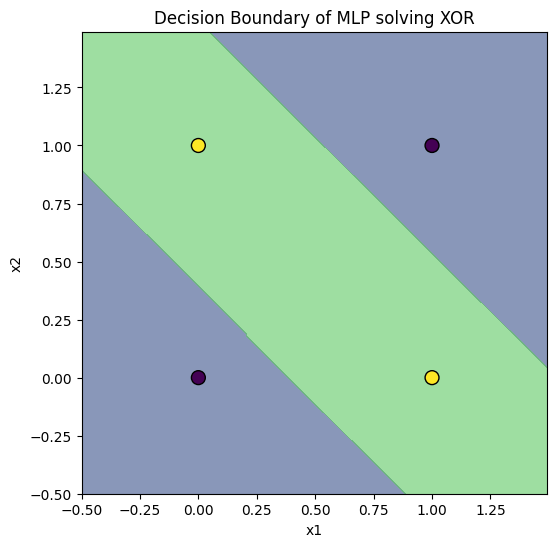

In [ ]:
import matplotlib.pyplot as plt

x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
h = 0.01

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
print(xx,yy)

grid = np.c_[xx.ravel(), yy.ravel()]
print(grid)

z1 = grid @ W1 + b1
a1 = sigmoid(z1)

z2 = a1 @ W2 + b2
Z = sigmoid(z2)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 6))

# Decision regions
plt.contourf(xx, yy, Z > 0.5, alpha=0.6)


# XOR points
plt.scatter(X[:, 0], X[:, 1], c=y_hat.ravel(), edgecolors='k', s=100)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of MLP solving XOR")
plt.show()
